In [1]:
from youtube_transcript_api import YouTubeTranscriptApi

from summarizer import Summarizer
from nltk.tokenize import TextTilingTokenizer

from matplotlib import pylab

from gensim.summarization import keywords

import my_func
import my_segment

import warnings

warnings.filterwarnings('ignore')

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c

In [2]:
link = 'https://www.youtube.com/watch?v=g1Pgo5yTIKg'
# link = 'https://www.youtube.com/watch?v=3vRC5TMbkaU'

link_id = link.replace('https://www.youtube.com/watch?v=', '')

data = YouTubeTranscriptApi.get_transcript(link_id)
data[:3]

[{'text': ">> It's my pleasure to\nwelcome Bhaskar Mitra today.",
  'start': 3.9,
  'duration': 3.32},
 {'text': 'Bhaskar is actually stationed', 'start': 7.231, 'duration': 2.579},
 {'text': 'in our London office currently.',
  'start': 9.811,
  'duration': 1.779}]

In [3]:
text = ''.join([data[i]['text']+' ' for i in range(len(data))])

In [4]:
text_main = my_func.my_processing(text)
my_func.my_save_file('text_main.txt', text_main)
text_without_punct = text_main.replace('.', '').lower()

In [8]:
text_NNsplit = my_segment.segment('NNsplit', text_without_punct)
# my_func.my_save_file('NNsplit.txt', text_NNsplit)

In [10]:
model = Summarizer()

In [11]:
text = text_NNsplit

In [12]:
len(text.split(' '))

12146

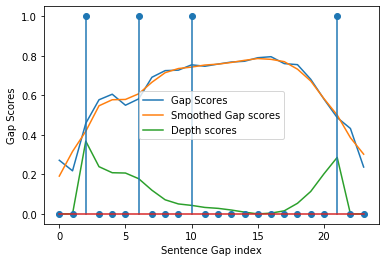

In [13]:
ww =  500
tt = TextTilingTokenizer(demo_mode=True, w = ww)
s, ss, d, b = tt.tokenize(text[:].replace("\n", " ").replace(".", ".\n\n"))
ttt = TextTilingTokenizer(w = ww)
tokens = ttt.tokenize(text.replace("\n", " ").replace(".", ".\n\n"))
pylab.xlabel("Sentence Gap index")
pylab.ylabel("Gap Scores")
pylab.plot(range(len(s)), s, label="Gap Scores")
pylab.plot(range(len(ss)), ss, label="Smoothed Gap scores")
pylab.plot(range(len(d)), d, label="Depth scores")
pylab.stem(range(len(b)), b)
pylab.legend()
pylab.show()

In [14]:
# tt = TextTilingTokenizer(demo_mode=True)

# s, ss, d, b = tt.tokenize(text[:].replace("\n", " ").replace(".", ".\n\n"))
# ttt = TextTilingTokenizer()
# tokens = ttt.tokenize(text.replace("\n", " ").replace(".", ".\n\n"))
# pylab.xlabel("Sentence Gap index")
# pylab.ylabel("Gap Scores")
# pylab.plot(range(len(s)), s, label="Gap Scores")
# pylab.plot(range(len(ss)), ss, label="Smoothed Gap scores")
# pylab.plot(range(len(d)), d, label="Depth scores")
# pylab.stem(range(len(b)), b)
# pylab.legend()
# pylab.show()

In [15]:
for token in tokens:
    paragraph = token.replace("\n", "")
    print(paragraph)
    print("\n") 

its my pleasure to welcome bhaskar mitra today. bhaskar is actually stationed in our london office. currently hes been at microsoft now about 11 years is that right yes about 11 years as a scientist in bing and somewhere. during that time. he switched to being a student about a year or two ago still while working at bing so hes working full time and completing his p at ucl under emine yilmaz who many of us know and have collaborated with as well. hes become one of the leaders in applying neural models specifically to information retrieval problems. he and nick craswell have a nice paper if you would like to read it. thats available on the web right now currently under submission to foundations and trends and information. retrieval that compare traditional ways of approaching information. retrieval models and where their parallels are in the neural world and hes going to talk to us about. some of his recent work so with that ill have bhaskar take it away. thanks for the nice introductio

In [16]:
i = 0
for token in tokens:
#     print(token.replace("\n", " "))
    print(i, keywords(token.replace("\n", " "), ratio=0.3).replace("\n", "\ "))
    i += 1
    #     print("\n") 

0 different\ differently\ learning\ query\ neural models specifically\ text\ representation\ representations\ specific\ big\ today\ todays\ search\ recent\ recently\ retrieval\ retrieve\ weve\ online\ traditional\ main\ possible\ framework\ frameworks\ model\ hes\ right\ general overview\ generating manually designed\ nice paper\ papers\ like\ look\ input\ bhaskar\ early\ actually\ office\ mentioned\ available\ nick\ area\ areas\ engine
1 actually\ featurize\ featurization\ features like\ feature space\ youre\ different\ start\ starts\ example\ examples\ spaces\ seattle\ representations\ representation\ words\ word\ embeddings\ embedding\ items\ item\ based\ particular\ seahawks\ topic\ vector\ vectors\ things\ thing\ zero\ similar\ similarity\ wilson\ people\ explicitly\ plus\ come\ coming\ banana\ neural network\ small toy\ long versus\ basically\ diagram\ important\ thats\ pretty popular especially\ factors\ factorize\ factorization\ right\ domes\ dome\ given\ let\ lets
2 queries\ r

In [17]:
timestamps = []
ii = 0
for j in range(1, len(data)):
    for i in range(ii, len(tokens)):
        if data[j]['text'].replace("\n", " ")\
                .split('.')[0] in tokens[i].replace("\n", "")\
                .replace(".", ""):
            timestamps += [data[j]['start']]
            ii += 1
            break


In [18]:
timestamps_min = [str(int(x // 3600))+ ':' + 
                  str(int(x // 60 % 60)) + ':' + \
                  str(int(x % 60)) for x in timestamps]

In [19]:
for j in range(len(timestamps_min)):
    print(timestamps[j], timestamps_min[j])

29.691 0:0:29
338.761 0:5:38
1045.436 0:17:25
1710.981 0:28:30
3233.761 0:53:53


In [20]:
i = 0
for j in range(min(len(tokens), len(timestamps_min))):
#     print(token.replace("\n", " "))
    print(i, timestamps_min[i], keywords(tokens[j] .replace(
                    "\n", " "), ratio=0.05).replace("\n", "\ "))
    i += 1
    #     print("\n") 

0 0:0:29 different\ differently\ neural\ learning\ query\ text\ representation\ representations
1 0:5:38 actually\ feature\ featurize\ featurization\ features like\ youre\ different\ start\ starts\ example\ examples
2 0:17:25 query\ queries\ like document\ actually\ actual\ different\ documents\ embedding\ embeddings\ modelled\ model\ models\ right\ youre\ similar\ similarity
3 0:28:30 models\ model\ modeling\ like\ likely\ query\ queries\ word\ words\ different\ difference\ differently\ differ\ document\ documents\ actually\ actual\ termed\ terms\ term\ training\ trained\ train\ matching\ matches\ match\ matched\ right\ basically\ embeddings\ embedding\ learns\ learn\ learned\ learning\ things\ thing\ yes\ text\ youre\ data\ datas\ representation\ representations\ based
4 0:53:53 model\ models\ query\ queries\ different\ difference\ clicked\ actually\ thats\ like click\ documents\ document\ yes
